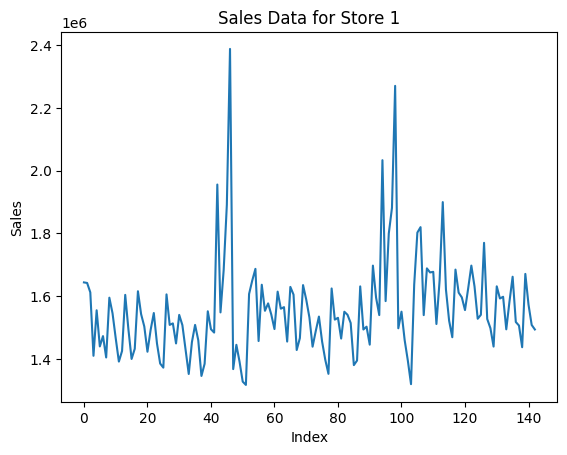

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Filter the data for store 1
store_1_data = df[df['Store'] == 1]
# Extract sales data
sales_data = store_1_data['Weekly_Sales']

# Plot the data
plt.plot(sales_data)
plt.title('Sales Data for Store 1')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()


In [3]:
# Need to check if data is stationary before fitting a model
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")

ADF Statistic: -5.102186
p-value: 0.000014
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
The series is likely stationary.


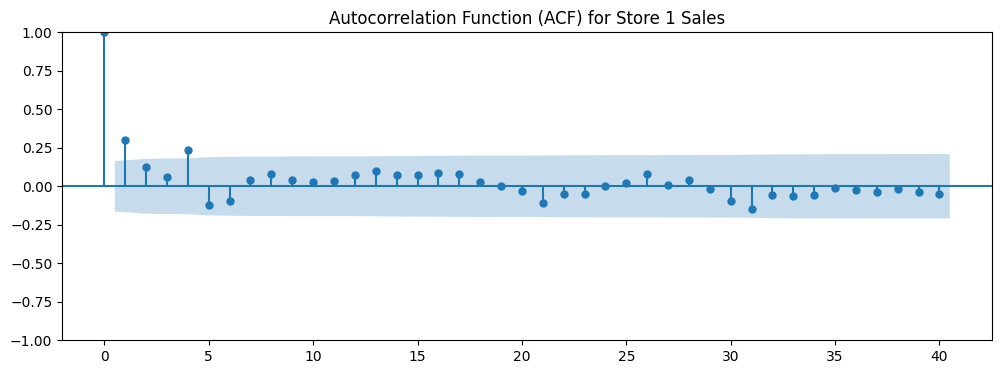

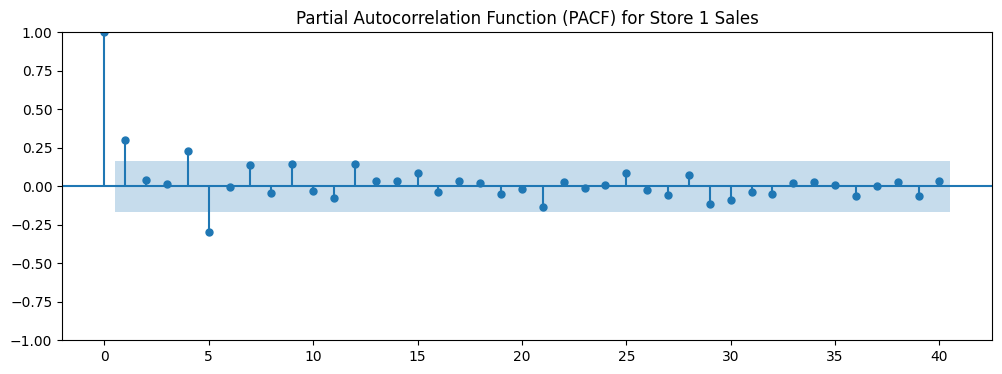

In [4]:
# Let's plot PACF and ACF too
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_acf(sales_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Store 1 Sales')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(sales_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Store 1 Sales')
plt.show()

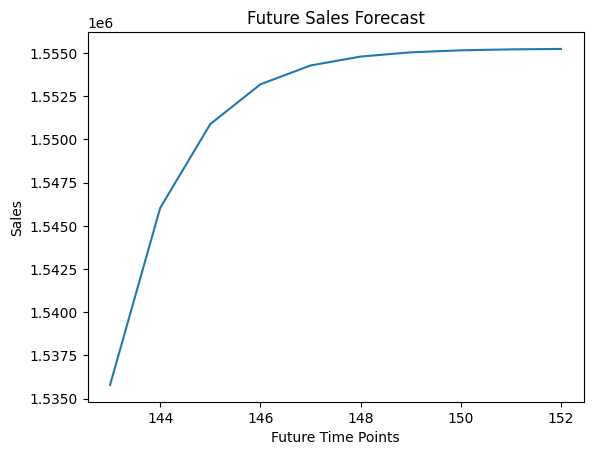

In [5]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales_data, order=(1, 0, 1))
fitted_model = model.fit()

# Forecast the next 10 values
forecast = fitted_model.forecast(steps=10)

# Plot the forecast
plt.plot(forecast)
plt.title('Future Sales Forecast')
plt.xlabel('Future Time Points')
plt.ylabel('Sales')
plt.show()

ARIMA predicts a threshold areound 1.55 * 10^6

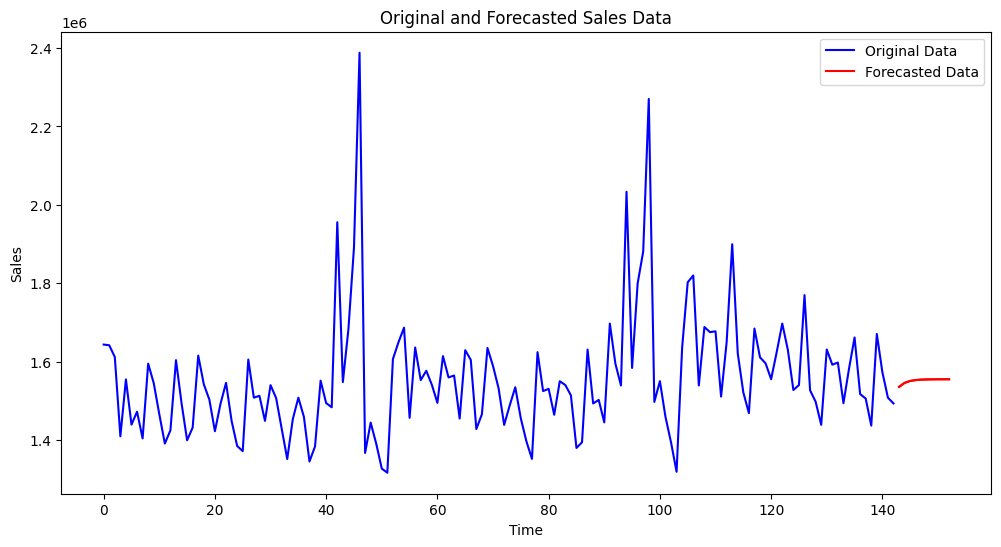

In [6]:
# Combine original and forecasted data for plotting
combined_data = pd.concat([sales_data, forecast])

# Plot the original data
plt.figure(figsize=(12,6))
plt.plot(sales_data, color='blue', label='Original Data')
plt.plot(combined_data.index[-10:], forecast, color='red', label='Forecasted Data')
plt.plot(combined_data.index[-10:], forecast, color='red') # Points for forecasted data
plt.legend()
plt.title('Original and Forecasted Sales Data')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

Compare this with forecasting using Facebook Prophet:


In [7]:
pip install prophet

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rgkpbzi/qcjtefs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rgkpbzi/4apf7e6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/pyt

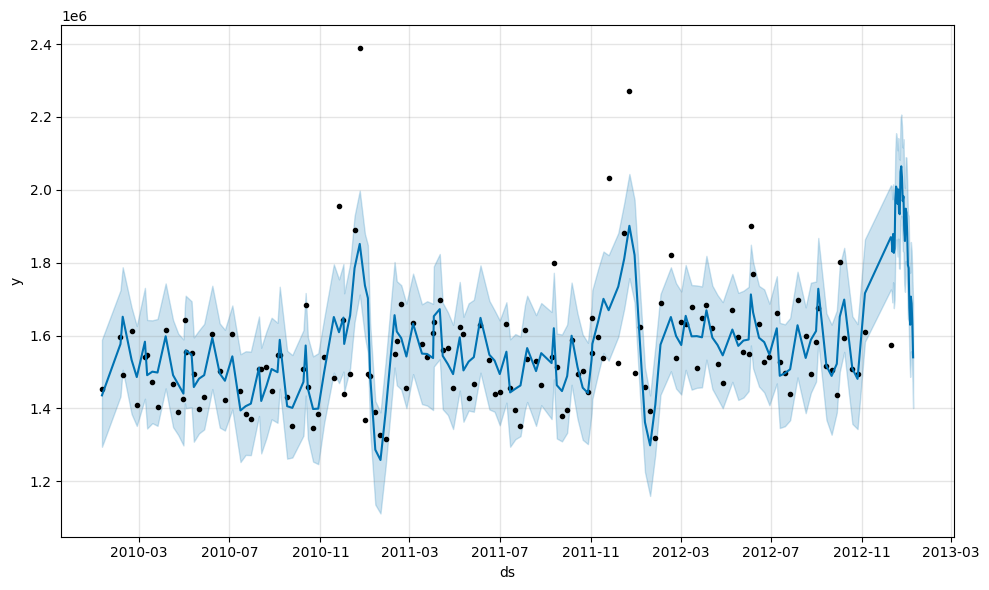

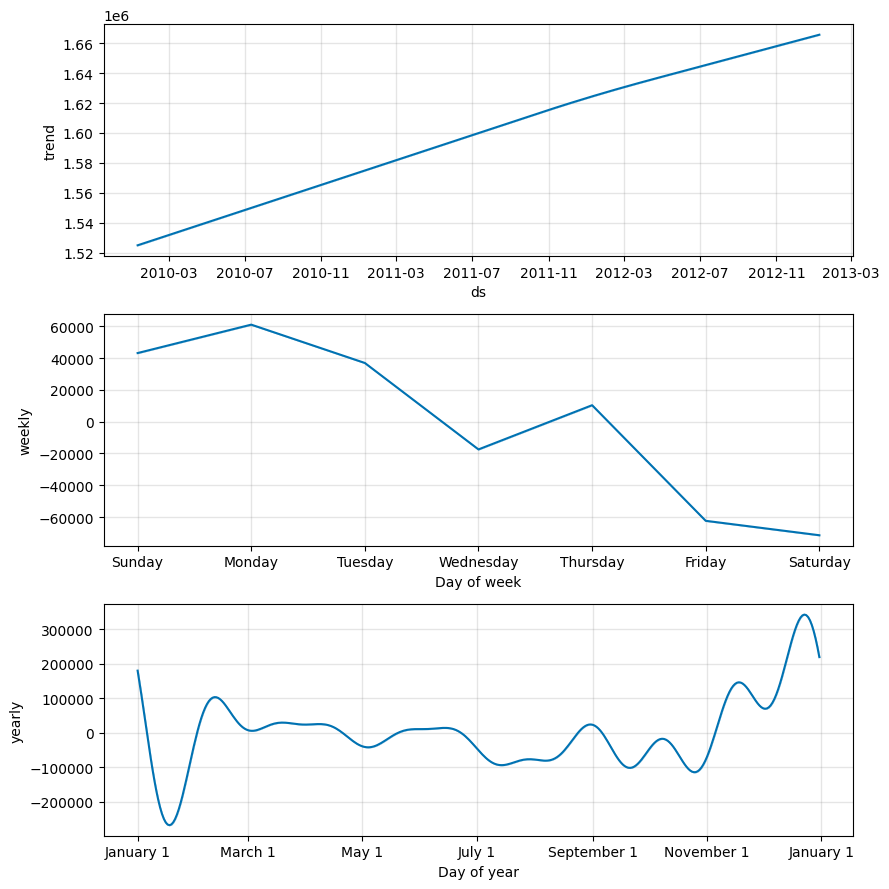

In [8]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('Walmart.csv')
df = df[df['Store'] == 1][['Date', 'Weekly_Sales']]
df.columns = ['ds', 'y']  # Rename the columns for Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the components (trend, yearly seasonality, and weekly seasonality, if applicable)
fig2 = model.plot_components(forecast)
plt.show()



Much better!!!

In [11]:
# Let's check the performance
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(model, initial='540 days', period='180 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

INFO:prophet:Making 2 forecasts with cutoffs between 2011-12-16 00:00:00 and 2012-06-13 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rgkpbzi/68gmfpwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rgkpbzi/4zcotqn9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86759', 'data', 'file=/tmp/tmp_rgkpbzi/68gmfpwt.json', 'init=/tmp/tmp_rgkpbzi/4zcotqn9.json', 'output', 'file=/tmp/tmp_rgkpbzi/prophet_model42pzl468/prophet_model-20240105011137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rgkpbzi/0422d2cs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rgkpbzi/9ibja6_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  horizon           mse           rmse            mae      mape     mdape  \
0 14 days  5.817636e+10  241197.767636  188466.967155  0.105430  0.102297   
1 16 days  5.817604e+10  241197.089363  188440.321851  0.105468  0.102297   
2 21 days  2.768752e+10  166395.658551  113952.402255  0.075094  0.041549   
3 26 days  2.699435e+10  164299.561029  108512.796072  0.070837  0.033035   
4 28 days  5.126028e+09   71596.286640   58832.288642  0.038184  0.033035   

      smape  coverage  
0  0.103290      0.50  
1  0.103324      0.50  
2  0.069810      0.75  
3  0.065720      0.75  
4  0.039099      1.00  


sMAPE drops to  0.039099, very good

In [14]:
# Predicted sales for the next 30 days

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds          yhat    yhat_lower    yhat_upper
143 2012-12-11  1.864921e+06  1.720672e+06  2.010032e+06
144 2012-12-12  1.830491e+06  1.691194e+06  1.974464e+06
145 2012-12-13  1.878870e+06  1.746275e+06  2.015126e+06
146 2012-12-14  1.826972e+06  1.675334e+06  1.974597e+06
147 2012-12-15  1.838404e+06  1.697389e+06  1.970202e+06
148 2012-12-16  1.972666e+06  1.833730e+06  2.110709e+06
149 2012-12-17  2.008963e+06  1.862791e+06  2.155326e+06
150 2012-12-18  2.001502e+06  1.863618e+06  2.142489e+06
151 2012-12-19  1.961539e+06  1.817073e+06  2.108337e+06
152 2012-12-20  2.001026e+06  1.866517e+06  2.141742e+06
153 2012-12-21  1.936944e+06  1.784518e+06  2.085882e+06
154 2012-12-22  1.933048e+06  1.783541e+06  2.082719e+06
155 2012-12-23  2.049063e+06  1.916623e+06  2.194645e+06
156 2012-12-24  2.064492e+06  1.928750e+06  2.206604e+06
157 2012-12-25  2.033905e+06  1.896039e+06  2.175359e+06
158 2012-12-26  1.968982e+06  1.832923e+06  2.116205e+06
159 2012-12-27  1.982146e+06  1